In [1]:
from IterateDataSet import ExtractDataSetFeatures
import numpy as np
import random

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import svm
from Classifier import ClassifyKCrossValidation
import scipy.io as sio
import scipy.misc


Feature Extraction 

In [20]:
root = 'E:\\UNIGE MSC\\Project\\lfwcrop_grey\\lfwcrop_grey\\Multiclass\\'
#root = 'E:\\UNIGE MSC\\Project\\lfwcrop_grey\\lfwcrop_grey\\larger'

#root = 'C:\\Users\\IssaMawad\\Downloads\\PhD_tool\\PhD_tool\\demos\\database'
#root= 'C:\\Users\\IssaMawad\\Downloads\\grimace\\aligned\\'
#root= 'C:\\Users\\IssaMawad\\Downloads\\faces96\\aligned\\'
x,y = ExtractDataSetFeatures(root,features_type='lgbp',imageExt='pgm')
x = np.asarray(x)
y = np.asarray(y)
print(x.shape)

C:\Users\IssaMawad\Anaconda4\envs\tensorflow\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\IssaMawad\Anaconda4\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(280, 10240)


In [21]:
import scipy.io
scipy.io.savemat('LFW-easy\\gbr.mat', mdict={'x': x,'y':y})

In [3]:
dataset= sio.loadmat('YaleFinal\\hog.mat')
x = dataset['x']
y = dataset['y']
ClassifyKCrossValidation(x,y,use_dimentionality_reduction='false',dimentionality_reduction='pca',pca_components=10,Classifier='knn',params = [1,3,5,7],distance_metric='manhattan')

             precision    recall  f1-score   support

       and        0.71      1.00      0.83        10
       ant        1.00      1.00      1.00        10
       chr        1.00      0.80      0.89        10
       dah        0.56      1.00      0.71        10
       dav        1.00      0.70      0.82        10
       den        0.59      1.00      0.74        10
       glen       0.83      1.00      0.91        10
       ian        0.62      1.00      0.77        10
       jer        1.00      1.00      1.00        10
       john       0.89      0.80      0.84        10
       lib        1.00      0.80      0.89        10
       mike       1.00      1.00      1.00        10
       pat        0.78      0.70      0.74        10
       sar        1.00      0.70      0.82        10
       ste        0.80      0.40      0.53        10
       stu        1.00      0.60      0.75        10
       tom        1.00      1.00      1.00        10
       will       1.00      0.33      0.50   

C:\Users\IssaMawad\AppData\Roaming\Python\Python35\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

       and        0.88      0.70      0.78        10
       ant        1.00      1.00      1.00        10
       chr        1.00      0.80      0.89        10
       dah        1.00      1.00      1.00        10
       dav        0.53      1.00      0.69        10
       den        0.80      0.80      0.80        10
       glen       0.89      0.80      0.84        10
       ian        0.91      1.00      0.95        10
       jer        1.00      0.80      0.89        10
       john       0.78      0.70      0.74        10
       lib        0.89      0.80      0.84        10
       mike       0.75      0.60      0.67        10
       pat        0.41      0.70      0.52        10
       sar        0.77      1.00      0.87        10
       ste        0.77      1.00      0.87        10
       stu        1.00      1.00      1.00        10
       tom        1.00      0.70      0.82        10
       will       0.00      0.00      0.00   

AttributeError: module 'numpy' has no attribute 'range'

Feature Learning

In [22]:
from LearnFeatures import GetLearnedFeatures
x,y = GetLearnedFeatures(root)
print(x.shape)
print(y.shape)

Model filename: C:\Users\IssaMawad\Documents\DSIP_ML_Project\cnn\models\20170512-110547.pb


C:\Users\IssaMawad\Anaconda4\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Runnning forward pass on LFW images
(280, 128)
(280,)


Classification using Supervised Dimentioality Reduction (LDA)

In [47]:
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


#x= scipy.io.loadmat('E:\\UNIGE MSC\\ML\\Class 16-17 Lab\\hog.mat')
#x = x['dataset']

skf = StratifiedKFold(n_splits=2)
i=0
cs = [0.5,1,1.5,1,1.2,1.5,2,2.5,3]
acc = [0,1,2,3,4,5,6,7,8,9,10,11]
err = np.zeros(12)


target_names = np.unique(y)
#target_names=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40']
#target_names = ['carp','garner','lopez','greenstock','zermin','liberman','archoft','mohammad','bolton','putin','ryder']
#target_names = ['face','other']
for j in range(3):
    for train, test in skf.split(x, y):
        
        model = svm.SVC(kernel='linear',degree=3,C=cs[j])

        xtr = x[train]
        ytr = y[train]
        xts = x[test]
        yts = y[test]
        
        lda = LinearDiscriminantAnalysis(n_components=18).fit(xtr,ytr)
        
        xtr2 = lda.transform(xtr)
        xts2 = lda.transform(xts)
        model.fit(xtr2,ytr)

        out = model.predict(xts2)
        print(classification_report(yts, out, target_names=target_names))
        err[i] = 1-(np.argwhere(yts!=out).shape[0]/xts2.shape[0])
       
        i = i+1
plt.plot(acc,err)
    



C:\Users\IssaMawad\AppData\Roaming\Python\Python35\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


             precision    recall  f1-score   support

        and       1.00      1.00      1.00        10
        ant       1.00      1.00      1.00        10
        chr       1.00      1.00      1.00        10
        dah       1.00      1.00      1.00        10
        dav       1.00      0.70      0.82        10
        den       1.00      1.00      1.00        10
       glen       1.00      1.00      1.00        10
        ian       0.71      1.00      0.83        10
        jer       0.75      0.60      0.67        10
       john       0.91      1.00      0.95        10
        lib       1.00      0.80      0.89        10
       mike       0.83      1.00      0.91        10
        pat       0.47      0.90      0.62        10
        sar       1.00      0.40      0.57        10
        ste       1.00      0.80      0.89        10
        stu       0.91      1.00      0.95        10
        tom       0.91      1.00      0.95        10
       will       1.00      0.67      0.80   

KeyboardInterrupt: 

Classsification

In [39]:
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


#x= scipy.io.loadmat('E:\\UNIGE MSC\\ML\\Class 16-17 Lab\\hog.mat')
#x = x['dataset']

skf = StratifiedKFold(n_splits=2)
i=0
cs = [0.1,1,10,20,50,100,0.0001]
acc = range(20)
err = np.zeros(20)


target_names = np.unique(y)
#target_names=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40']
#target_names = ['carp','garner','lopez','greenstock','zermin','liberman','archoft','mohammad','bolton','putin','ryder']
#target_names = ['face','other']
for j in range(7):
    for train, test in skf.split(x, y):
        
        
        
        model = svm.SVC(kernel='poly',degree=4,C=cs[j],gamma=cs[j])
        
        
        xtr = x[train]
        ytr = y[train]
        xts = x[test]
        yts = y[test]
        print(xtr.shape)
        print(xts.shape)
        model.fit(xtr,ytr)

        out = model.predict(xts)
        
        print(classification_report(yts, out, target_names=target_names))
        err[i] = 1-(np.argwhere(yts!=out).shape[0]/xts.shape[0])
       
        i = i+1
plt.plot(acc,err)
    



(179, 3920)
(179, 3920)
             precision    recall  f1-score   support

        and       0.50      1.00      0.67        10
        ant       1.00      1.00      1.00        10
        chr       1.00      0.90      0.95        10
        dah       0.82      0.90      0.86        10
        dav       0.75      0.30      0.43        10
        den       0.91      1.00      0.95        10
       glen       1.00      1.00      1.00        10
        ian       0.67      1.00      0.80        10
        jer       0.90      0.90      0.90        10
       john       0.91      1.00      0.95        10
        lib       1.00      0.70      0.82        10
       mike       0.83      1.00      0.91        10
        pat       0.88      0.70      0.78        10
        sar       1.00      0.50      0.67        10
        ste       0.57      0.40      0.47        10
        stu       1.00      0.70      0.82        10
        tom       0.77      1.00      0.87        10
       will       0.7

KeyboardInterrupt: 

In [12]:
classification_report(yts, out, target_names=target_names).shape


AttributeError: 'str' object has no attribute 'shape'

In [20]:
#import bob.ip.gabor
import bob.bio.base

ImportError: No module named 'bob'

In [ ]:
from skimage.filters import gabor_kernel
gabor_kernel??

In [ ]:
from skimage.feature import local_binary_pattern
local_binary_pattern??

C:\Users\IssaMawad\Anaconda4\envs\tensorflow\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\IssaMawad\AppData\Roaming\Python\Python35\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


(400,)


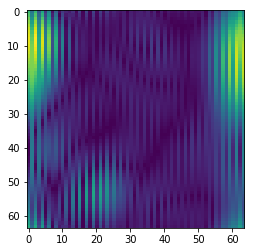

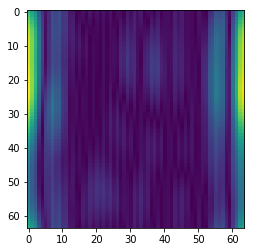

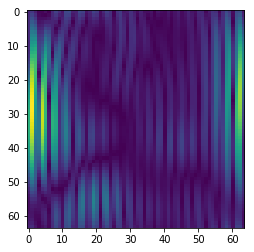

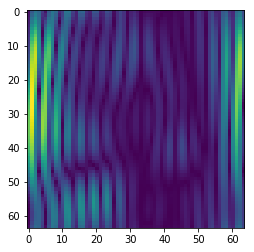

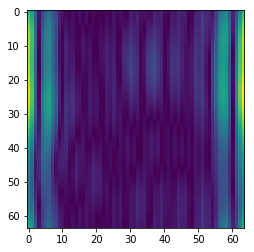

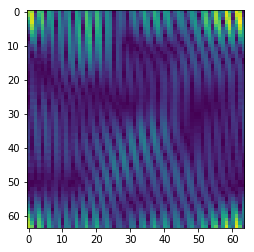

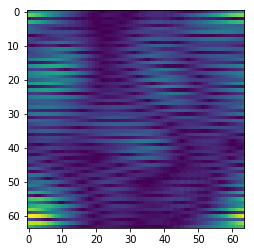

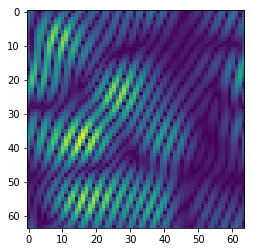

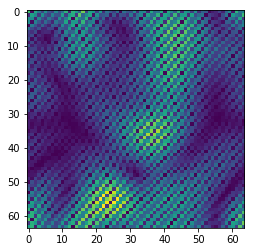

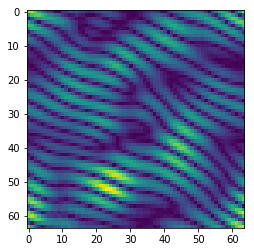

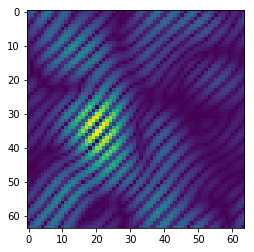

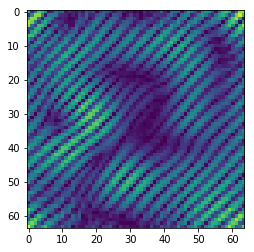

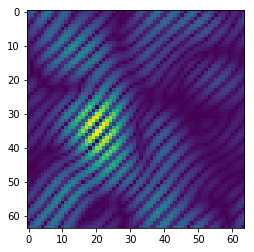

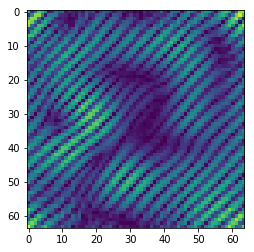

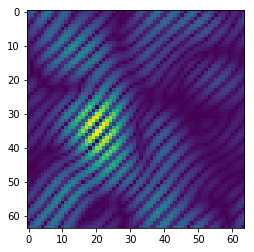

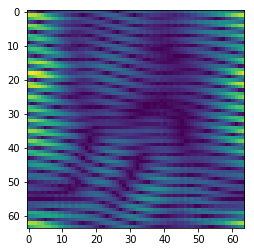

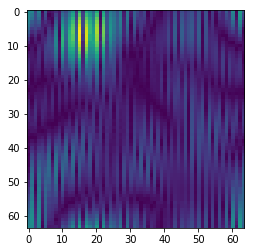

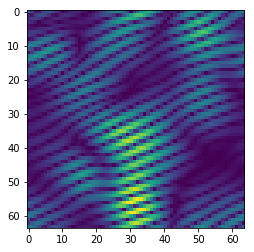

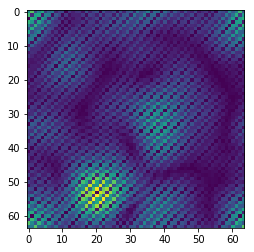

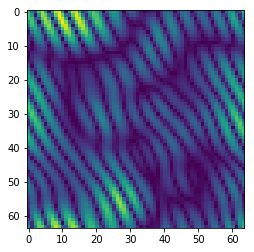

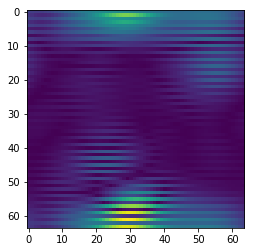

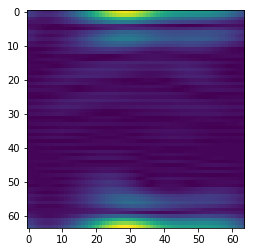

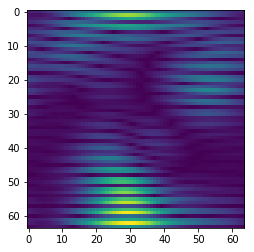

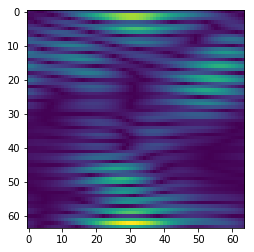

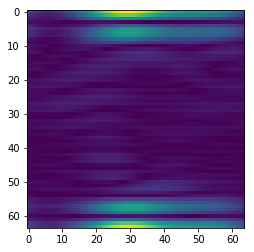

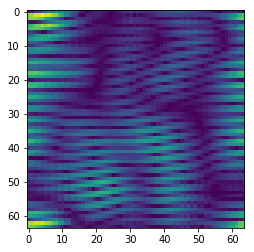

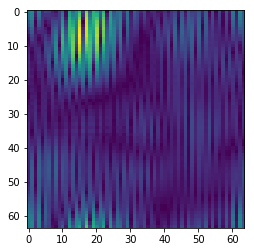

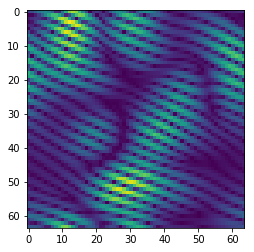

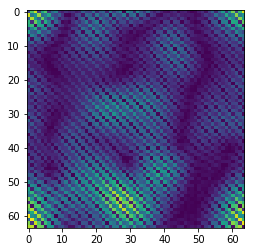

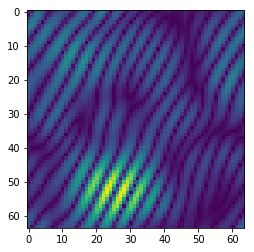

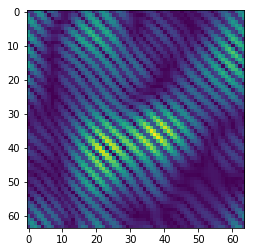

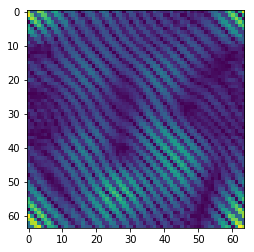

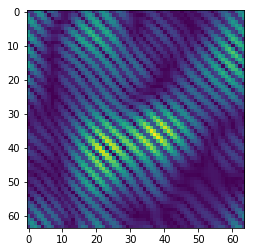

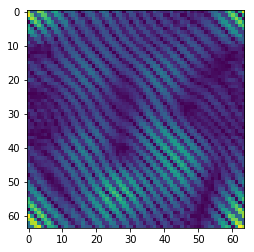

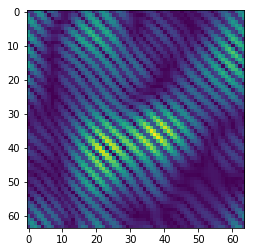

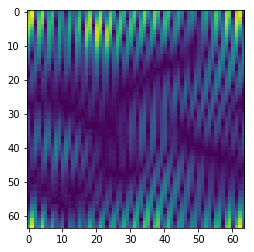

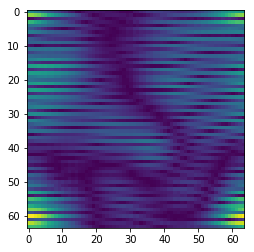

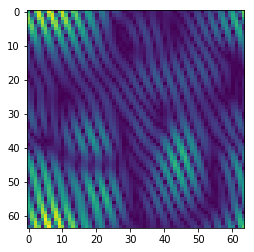

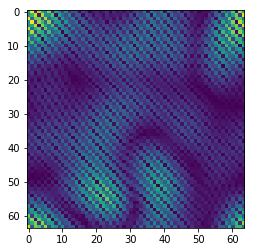

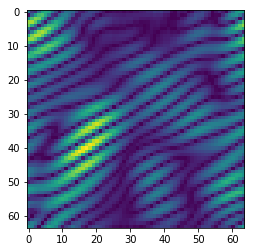

In [9]:
from skimage import data,exposure
from skimage.filters import gabor_kernel
import matplotlib.pyplot as plt

from scipy import ndimage as ndi
import numpy as np
from skimage.feature import local_binary_pattern
from scipy.fftpack import dct,idct
from zernike import Zernikemoment

fileName = 'E:\\UNIGE MSC\\Project\\lfwcrop_grey\\lfwcrop_grey\\standard\\Face\\Jennifer_Capriati_0013.pgm'
img = data.imread(fileName);
img = exposure.equalize_adapthist(img)
#block_size   # one or two parameters for block size
block_overlap = 0 # one or two parameters for block overlap
      # Gabor parameters
gabor_directions = 8
gabor_scales = 5
gabor_sigma = 2. * np.pi
gabor_maximum_frequency = np.pi / 2.
gabor_frequency_step = np.sqrt(.5)
gabor_power_of_k = 0
gabor_dc_free = True
use_gabor_phases = False
  # LBP parameter
lbp_radius = 2
lbp_neighbor_count = 8
lbp_uniform = True
lbp_circular = True
lbp_rotation_invariant= False
lbp_compare_to_average = False
lbp_add_average = False
  # histogram options
sparse_histogram = False
split_histogram = None
block_size = 10
block_overlap = 4
output = np.zeros(400)
i = 0;
for theta in range(8):
    theta = theta / 8. * np.pi
    for frequency in ((np.pi/2) - (4*gabor_frequency_step),(np.pi/2) - (3*gabor_frequency_step),(np.pi/2) - (2*gabor_frequency_step),(np.pi/2) - gabor_frequency_step,np.pi/2):
        kernel = gabor_kernel(frequency, theta=theta,sigma_x=gabor_sigma,sigma_y = gabor_sigma)
        filtered = np.abs(ndi.convolve(img, kernel, mode='wrap'))
        lbp = local_binary_pattern(filtered, lbp_neighbor_count, lbp_radius, 'uniform')
        n_bins = int(lbp.max() + 1)
        plt.imshow(filtered)
        plt.figure()
        h = np.histogram(lbp.ravel(), normed=True, bins=n_bins, range=(0, n_bins))
        output[i:i+10] = h[0]
        
        i = i+10
print(output.shape)

In [22]:
clf.predict??

In [ ]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier??

In [ ]:
clf = neighbors.KNeighborsClassifier

In [ ]:
clf = neighbors.KNeighborsClassifier(3,metric = 'pyfunc',metric_params={"func":kullback_leibler_divergence} )


In [ ]:
def kullback_leibler_divergence(p, q):
    p = np.asarray(p)
    q = np.asarray(q)
    filt = np.logical_and(p != 0, q != 0)
    return np.sum(p[filt] * np.log2(p[filt] / q[filt]))

In [42]:
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import neighbors

#x= scipy.io.loadmat('E:\\UNIGE MSC\\ML\\Class 16-17 Lab\\hog.mat')
#x = x['dataset']

skf = StratifiedKFold(n_splits=2)
i=0
cs = [1,3,5,7,9]
acc = [0,1,2,3,4,5,6,7,8,9,10,11]
err = np.zeros(12)


target_names = np.unique(y)
#target_names=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40']
#target_names = ['carp','garner','lopez','greenstock','zermin','liberman','archoft','mohammad','bolton','putin','ryder']
#target_names = ['face','other']
for j in range(5):
    for train, test in skf.split(x, y):
        
        
        
        model = neighbors.KNeighborsClassifier(cs[j] ,metric='chebichev')
        
        
        xtr = x[train]
        ytr = y[train]
        xts = x[test]
        yts = y[test]
       
        model.fit(xtr,ytr)

        out = model.predict(xts)
        
        print(classification_report(yts, out, target_names=target_names))
        err[i] = 1-(np.argwhere(yts!=out).shape[0]/xts.shape[0])
       
        i = i+1
plt.plot(acc,err)

ValueError: Metric 'chebichev' not valid for algorithm 'auto'

In [7]:
import scipy.io as sio
sio.savemat('YaleFinal/FacenetFeatures.mat', {'x':x,'y':y})

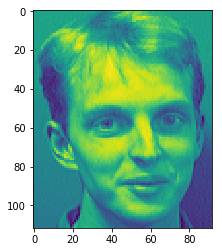

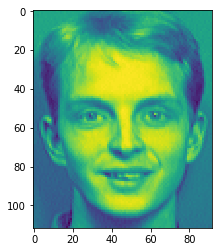

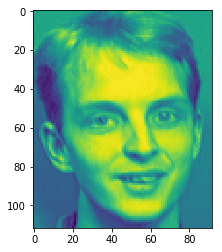

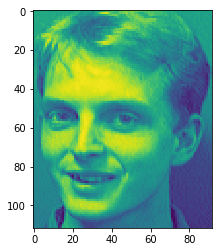

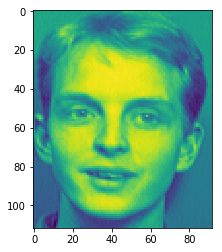

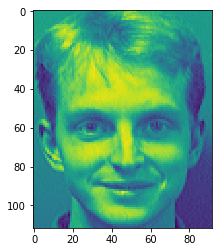

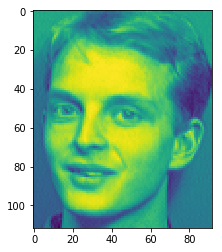

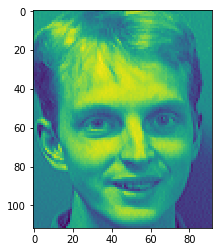

In [3]:
import scipy.misc as misc
import skimage.transform as trans
from skimage import data
import matplotlib.pyplot as plt
img = data.imread('C:\\Users\\IssaMawad\\Downloads\\PhD_tool\\PhD_tool\\demos\\database\\s40\\1.pgm')
plt.figure()
plt.imshow(img)
img = data.imread('C:\\Users\\IssaMawad\\Downloads\\PhD_tool\\PhD_tool\\demos\\database\\s40\\2.pgm')
plt.figure()
plt.imshow(img)
img = data.imread('C:\\Users\\IssaMawad\\Downloads\\PhD_tool\\PhD_tool\\demos\\database\\s40\\3.pgm')
plt.figure()
plt.imshow(img)
img = data.imread('C:\\Users\\IssaMawad\\Downloads\\PhD_tool\\PhD_tool\\demos\\database\\s40\\4.pgm')
plt.figure()
plt.imshow(img)
img = data.imread('C:\\Users\\IssaMawad\\Downloads\\PhD_tool\\PhD_tool\\demos\\database\\s40\\5.pgm')
plt.figure()
plt.imshow(img)
img = data.imread('C:\\Users\\IssaMawad\\Downloads\\PhD_tool\\PhD_tool\\demos\\database\\s40\\6.pgm')
plt.figure()
plt.imshow(img)
img = data.imread('C:\\Users\\IssaMawad\\Downloads\\PhD_tool\\PhD_tool\\demos\\database\\s40\\7.pgm')
plt.figure()
plt.imshow(img)
img = data.imread('C:\\Users\\IssaMawad\\Downloads\\PhD_tool\\PhD_tool\\demos\\database\\s40\\8.pgm')
plt.figure()
plt.imshow(img)

In [ ]:
mod = trans.resize

In [7]:
print(x.shape)
print(y.shape)

(400, 200)
(400,)


In [4]:
print(img.shape)

(112, 92)


In [6]:
v = extractGaborLBP('C:\\Users\\IssaMawad\\Downloads\\PhD_tool\\PhD_tool\\demos\\database\\s40\\1.pgm')
print(v.shape)

C:\Users\IssaMawad\Anaconda4\envs\tensorflow\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\IssaMawad\Anaconda4\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


ValueError: could not broadcast input array from shape (768) into shape (256)

In [4]:
from skimage import data,exposure
from skimage.filters import gabor_kernel
from PIL import Image
import matplotlib.pyplot as plt

from scipy import ndimage as ndi
import numpy as np
from skimage.feature import local_binary_pattern
from scipy.fftpack import dct,idct
from zernike import Zernikemoment
import skimage.transform as trans
def extractGaborLBP(fileName):
    img = data.imread(fileName);
    img = exposure.equalize_adapthist(img)
       # one or two parameters for block size
    block_overlap = 0 # one or two parameters for block overlap
          # Gabor parameters
    gabor_directions = 8
    gabor_scales = 5
    gabor_sigma = 2. * np.pi
    gabor_maximum_frequency = np.pi / 2.
    gabor_frequency_step = np.sqrt(.5)
    gabor_power_of_k = 0
    gabor_dc_free = True
    use_gabor_phases = False
      # LBP parameter
    lbp_radius = 2
    lbp_neighbor_count = 8
    lbp_uniform = True
    lbp_circular = True
    lbp_rotation_invariant= False
    lbp_compare_to_average = False
    lbp_add_average = False
      # histogram options
    sparse_histogram = False
    split_histogram = None
    block_size = 10
    block_overlap = 4
    #output = np.zeros(400)
    output = np.zeros(256*40)
    i = 0;
    for theta in range(8):
        theta = theta / 8. * np.pi
        for frequency in ((np.pi/2) - (4*gabor_frequency_step),(np.pi/2) - (3*gabor_frequency_step),(np.pi/2) - (2*gabor_frequency_step),(np.pi/2) - gabor_frequency_step,np.pi/2):
            kernel = gabor_kernel(frequency, theta=theta,sigma_x=gabor_sigma,sigma_y=gabor_sigma)
            filtered = np.abs(ndi.convolve(img, kernel, mode='wrap'))
                
            #lbp = local_binary_pattern(filtered, lbp_neighbor_count, lbp_radius, 'uniform')
            #n_bins = int(lbp.max() + 1)
            #h = np.histogram(lbp.ravel(), normed=True, bins=n_bins, range=(0, n_bins))
            #output[i:i+10] = h[0]
            output[i:i+256]= trans.resize(filtered,[16,16,3]).ravel()
            i = i+256
    return output

In [5]:
print(filtered)

NameError: name 'filtered' is not defined

In [8]:
from scipy.fftpack import dct

In [5]:
print(x.shape)

(198, 128)


In [11]:
print(np.unique(y))

['s1' 's10' 's11' 's12' 's13' 's14' 's15' 's16' 's17' 's18' 's19' 's2'
 's20' 's21' 's22' 's23' 's24' 's25' 's26' 's27' 's28' 's29' 's3' 's30'
 's31' 's32' 's33' 's34' 's35' 's36' 's37' 's38' 's39' 's4' 's40' 's5'
 's6' 's7' 's8' 's9']


In [7]:

roddick = data.imread('C:\\Users\\IssaMawad\\Downloads\\faces96\\aligned\\9540814\\2.jpg')
print(roddick.shape)
plt.imshow(roddick)


(90, 89, 3)


In [14]:
import skimage.transform as trans
rodBig = trans.resize(roddick,[160,160,3])

NameError: name 'roddick' is not defined

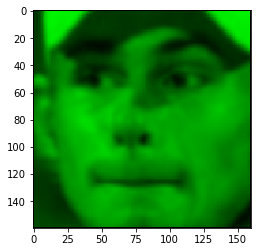

In [20]:
plt.imshow(rodBig)

In [3]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data,exposure,color
import skimage.transform as trans
def ReadImage(fileName):
    img = data.imread(fileName);
    if(len(img.shape)>2):
        imgGray = color.rgb2gray(img)
    else:
        imgGray = img
    if(imgGray.shape[0]>64 or imgGray.shape[1]>64):
        imgGray = trans.resize(imgGray,[64,64],mode='reflect')
    imgGray = exposure.equalize_adapthist(imgGray)
    return imgGray
    

In [12]:
import dlib
from skimage import data
import scipy.misc
x = data.imread('C:\\Users\\IssaMawad\\Downloads\\faces96\\aligned\\9540547\\13.jpg')
print(x[0,0,0])

ImportError: No module named 'dlib'

In [6]:
detector = dlib.get_frontal_face_detector()
img = data.imread('17.jpg')
dets = detector(img,1)

1
-17


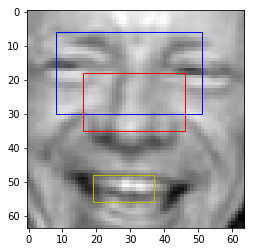

In [83]:
%matplotlib inline
from skimage import feature
import dlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches


from matplotlib import cm
#d = ReadImage('C:\\Users\\IssaMawad\\Downloads\\faces96\\aligned\\9540695\\9.jpg')
predictor_path = 'shape_predictor_68_face_landmarks.dat'
detector = dlib.get_frontal_face_detector()

img = data.imread('E:\\UNIGE MSC\\Project\\lfwcrop_grey\\lfwcrop_grey\\Multiclass\\Joe_Liberman\\Joe_Lieberman_0006.pgm')
predictor = dlib.shape_predictor(predictor_path)
dets = detector(img, 1)

#corners_map = feature.corner_shi_tomasi(d,1)
#corners = feature.corner_peaks(corners_map)

fig,ax1 = plt.subplots(1)


ax1.imshow(img, cmap=cm.gist_gray)
#plt.scatter(corners[:,1], corners[:,0], s=30)
print(len(dets))
for k, d in enumerate(dets):
        #print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
            #k, d.left(), d.top(), d.right(), d.bottom()))
        # Get the landmarks/parts for the face in box d.
        shape = predictor(img, d)
        points = shape.parts()
        print(points[36].x -points[32].x)
        ax1.add_patch(
            patches.Rectangle(
            (points[18].x, points[20].y),   # (x,y)
                          # width
                points[48].y-points[20].y, 
                points[27].x -points[18].x,# height
                linewidth=1,edgecolor='b',facecolor='none'
            )
        )
        ax1.add_patch(
            patches.Rectangle(
            (points[40].x, points[40].y),   # (x,y)
                          # width
                
                points[43].x -points[40].x,# height
                points[32].y-points[28].y, 
                linewidth=1,edgecolor='r',facecolor='none'
            )
        )
        ax1.add_patch(
            patches.Rectangle(
            (points[49].x, points[51].y),   # (x,y)
                          # width
                points[55].x -points[49].x,
                points[58].y-points[52].y, 
                # height
                linewidth=1,edgecolor='y',facecolor='none'
            )
        )
        #for j in range(8)
plt.show()
           
        # Draw the face landmarks on the screen.

In [66]:
print(x_recon.ravel().shape)

NameError: name 'x_recon' is not defined

In [18]:
img[0]

array([[120, 137, 153],
       [118, 135, 151],
       [118, 135, 151],
       [121, 138, 154],
       [124, 141, 157],
       [126, 143, 159],
       [124, 141, 157],
       [121, 138, 154],
       [118, 135, 151],
       [121, 138, 154],
       [124, 141, 157],
       [123, 140, 156],
       [121, 138, 154],
       [120, 137, 153],
       [121, 138, 154],
       [123, 140, 156],
       [118, 140, 153],
       [118, 140, 153],
       [118, 140, 153],
       [119, 141, 154],
       [119, 141, 154],
       [119, 141, 154],
       [119, 141, 154],
       [119, 141, 154],
       [116, 138, 151],
       [116, 138, 151],
       [117, 139, 152],
       [117, 139, 152],
       [117, 139, 152],
       [116, 138, 151],
       [114, 136, 149],
       [113, 135, 148],
       [121, 129, 152],
       [123, 131, 154],
       [124, 135, 155],
       [124, 137, 156],
       [122, 137, 156],
       [121, 138, 156],
       [121, 140, 155],
       [120, 142, 156],
       [120, 141, 158],
       [120, 141

In [1]:
import scipy.misc
scipy.misc.imsave(str(i)+'.jpg', x)
plt.imshow(img)

NameError: name 'i' is not defined

In [2]:
from align_dataset import align
align('C:\\Users\\IssaMawad\\Downloads\\lfw-funneled\\lfw_funneled\\','C:\\Users\\IssaMawad\\Downloads\\lfw-funneled\\aligned\\',imgExt='jpg')

C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Aaron_Eckhart
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Aaron_Guiel
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Aaron_Patterson
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Aaron_Peirsol
4
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Aaron_Pena
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Aaron_Sorkin
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Aaron_Tippin
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Abbas_Kiarostami
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Abba_Eban
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Abdel_Aziz_Al-Hakim
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Abdel_Madi_Shabneh
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Abdel_Nasser_Assidi
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Abdoulaye_Wade
4
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Abdulaziz_Kamilov
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Abdullah
4

C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Aleksander_Kwasniewski
4
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Aleksander_Voloshin
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Alek_Wek
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Alessandra_Cerna
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Alessandro_Nesta
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Alexander_Downer
4
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Alexander_Losyukov
4
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Alexander_Lukashenko
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Alexander_Payne
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Alexander_Rumyantsev
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Alexandra_Jackson
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Alexandra_Pelosi
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Alexandra_Rozovskaya
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Alexandra_Spann
1
C:\Users\IssaMawad\D

C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Anders_Fogh_Rasmussen
4
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Andreas_Vinciguerra
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Andrea_Bocelli
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Andrea_De_Cruz
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Andrea_Kiser
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Andrea_Yates
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Andrei_Konchalovsky
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Andrei_Mikhnevich
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Andrei_Nikolishin
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Andres_DAlessandro
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Andres_Manuel_Lopez_Obrador
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Andres_Pastrana
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Andrew_Bernard
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Andrew_Bunner
2
C:\Users\IssaMawad\Downloa

C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Ariel_Sharon
77
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Arie_Haan
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Arif_Mardin
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Ari_Bousbib
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Ari_Fleischer
13
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Arlen_Specter
3
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Armando_Avila_Panchame
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Armando_Calderon_Sol
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Armando_Carrillo
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Armand_Sargen
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Arminio_Fraga
6
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Arnaud_Clement
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Arnaud_Lagardere
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Arnie_Boehm
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Arnoldo_Alem

C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Bernard_Ebbers
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Bernard_Giraudeau
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Bernard_Kerik
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Bernard_Landry
4
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Bernard_Law
5
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Bernard_Lord
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Bernard_Siegel
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Bernice_Wong
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Bertie_Ahern
5
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Bertrand_Bonello
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Bertrand_Delanoe
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Beth_Blough
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Beth_Jones
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Betsy_Coffin
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Betsy_Smith
2
C:\Users\I

C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Boris_Becker
6
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Boris_Berezovsky
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Boris_Henry
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Boris_Jordan
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Boris_Trajkovski
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Boris_Yeltsin
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Boutros_Boutros_Ghali
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Bo_Pelini
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Bo_Ryan
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Brady_Rodgers
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Brad_Alexander_Smith
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Brad_Banks
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Brad_Brownell
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Brad_Garrett
4
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Brad_Gushue
1
C:\Users\

C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Candie_Kung
4
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Carey_Lowell
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Carina_Lau_Ka-ling
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Carin_Koch
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Cari_Davis
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Carla_Del_Ponte
5
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Carla_Gay_Balingit
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Carla_Gugino
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Carla_Moreno
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Carla_Myers
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Carla_Sullivan
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Carla_Tricoli
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Carlos_Alberto
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Carlos_Alberto_Parreira
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Carlos_Arroyo
1

C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Charles_Tannok
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Charles_Taylor
9
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Charley_Armey
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Charlie_Coles
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Charlie_Deane
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Charlie_Garner
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Charlie_Hunnam
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Charlie_Sheen
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Charlie_Williams
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Charlie_Zaa
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Charlize_Theron
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Charlotte_Casiraghi
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Charlotte_Chambers
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Charlotte_Church
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Charl

C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Cindy_Moll
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Cindy_Taylor
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Cindy_Zagorski
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Ciro_Gomes
5
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Claire_Danes
3
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Claire_De_Gryse
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Claire_Hentzen
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Claire_Leger
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Claire_Tomalin
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Clara_Harris
5
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Clare_Latimer
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Clare_Short
4
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Clark_Randt
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Claudette_Robinson
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Claude_Jorda
1
C:\Users\IssaMa

C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Daniel_Kurtzer
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Daniel_Montenegro
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Daniel_Montgomery
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Daniel_Ortega
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Daniel_Osorno
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Daniel_Patrick_Moynihan
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Daniel_Pearl
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Daniel_Radcliffe
4
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Daniel_Rouse
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Daniel_Scioli
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Daniel_Zelman
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Danis_Tanovic
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Danny_Ainge
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Danny_Avalon
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Danny_Elf

C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\David_Stern
4
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\David_Suazo
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\David_Surrett
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\David_Tornberg
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\David_Trimble
5
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\David_Welch
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\David_Wells
7
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\David_Westerfield
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\David_Wolf
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\David_Zeplowitz
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Davis_Love_III
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Dawna_LoPiccolo
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Dawn_Staley
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Dean_Barker
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Dean_Barkley
4
C:\Users\IssaMaw

C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Donald_Hays
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Donald_Keck
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Donald_Keyser
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Donald_Pettit
3
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Donald_Regan
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Donald_Rumsfeld
121
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Donald_Trump
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Donatella_Versace
3
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Donna_Barrera
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Donna_Brazile
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Donna_Morrissey
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Donna_Ralston
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Donna_Shalala
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Donna_Walker
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Donnie_Brennan
1
C:\Use

C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Elena_Dementieva
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Elena_de_Chavez
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Elena_Likhovtseva
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Elena_Tihomirova
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Elgin_Baylor
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Eliane_Karp
4
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Elias_Attallah
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Elijah_Wood
3
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Elijan_Ingram
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Elinor_Caplan
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Elin_Nordegren
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Eliott_Spitzer
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Elisabeth_Schumacher
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Elisabeth_Welch
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Elisha_

C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Etta_James
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Eugene_Melnyk
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Eugene_Teslovic
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Eunice_Barber
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Eurico_Guterres
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Evander_Holyfield
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Evan_Marriott
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Evan_Rachel_Wood
3
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Eva_Amurri
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Eva_Dimas
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Eva_Herzigova
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Eva_Marie_Saint
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Eva_Mendes
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Evelyn_Lauder
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Eve_Ensler
1
C:\Users\Issa

C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Franz_Fischler
4
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Franz_Gsell
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Franz_Muentefering
4
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Fran_Drescher
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Freda_Black
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Freddy_Garcia
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Freddy_Vasques_Kinchokpe
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Frederick_Madden
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Frederique_van_der_Wal
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Fredric_Seaman
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Fred_Durst
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Fred_Eckhard
3
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Fred_Funk
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Fred_Huff
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Fred_Rogers


C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\German_Khan
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Gerrit_Zalm
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Gerry_Adams
8
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Gerry_Kelly
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Gerry_Parsky
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Ghassan_Elashi
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Gholamreza_Aghazadeh
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Giancarlo_Fisichella
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Gianna_Angelopoulos-Daskalaki
3
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Giannina_Facio
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Gianni_Agnelli
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Gian_Marco
3
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Gideon_Black
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Gideon_Yago
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Gilberto

C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Hadley_Bilger
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Halbert_Fillinger
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Halle_Berry
16
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Hal_Gehman
5
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Hal_McCoy
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Hal_Sellers
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Hal_Sutton
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Hamad_Bin_Isa_al-Khalifa
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Hamad_Bin_Jassim
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Hama_Arba_Diallo
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Hamid_Efendi
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Hamid_Karzai
22
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Hamid_Reza_Asefi
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Hamzah_Haz
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Hamza_Atiya_Muhsen


C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Hisashi_Owada
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Hisham_Halawi
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Hitomi_Soga
5
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Hitoshi_Oshitani
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Hitoshi_Tanaka
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Hoda_Asfor
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Holly_Hunter
7
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Holly_Robinson_Peete
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Hong_Myung
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Hootie_Johnson
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Horace_Donovan_Reid
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Horace_Newcomb
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Horacio_de_Jesus_Montoya
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Horacio_Julio_Pina
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\

C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Jackie_Dennis
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Jackie_Sherrill
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Jacky_Cheung
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Jack_Goodman
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Jack_Grubman
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Jack_Knowlton
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Jack_LaLanne
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Jack_Nicholson
3
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Jack_Osbourne
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Jack_Smith
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Jack_Straw
28
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Jack_Valenti
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Jack_Welch
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Jacob_Frenkel
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Jacqueline_Edwards
1
C:\Users\IssaMa

C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Janice_Abreu
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Janice_Goldfinger
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Janine_Pietsch
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Janis_Ruth_Coulter
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Janusz_Kaminski
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Jan_Bjoerklund
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Jan_De_Bont
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Jan_Paul_Miller
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Jan_Petersen
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Jan_Peter_Balkenende
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Jan_Pronk
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Jan_Ullrich
6
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Jan_van_Breda_Kolff
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Jaouad_Gharib
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Jaquelin

C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Jennifer_Thompson
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Jennifer_Tilly
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Jenny_Romero
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Jens_Lehmann
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Jen_Bice
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Jen_Schefft
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Jeong_Se-hyun
9
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Jerelle_Kraus
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Jeremy_Fogel
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Jeremy_Gompertz
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Jeremy_Greenstock
24
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Jeremy_Shockey
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Jeremy_Wotherspoon
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Jeri_Ryan
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Jerome_Golmard
1
C:\Us

C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Joey_Buttafuoco
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Joey_Harrington
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Joey_Mantia
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Joe_Calzaghe
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Joe_Carnahan
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Joe_Cocker
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Joe_Cravens
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Joe_Crede
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Joe_Darrell
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Joe_DeLamielleure
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Joe_Dicaro
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Joe_Dumars
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Joe_Finley
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Joe_Friedberg
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Joe_Garner
1
C:\Users\IssaMawad\Downloads\

C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\John_Spencer
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\John_Stallworth
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\John_Starks
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\John_Stockton
5
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\John_Sununu
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\John_Sweeney
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\John_Swofford
3
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\John_Taylor
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\John_Thune
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\John_Timoney
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\John_Travolta
7
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\John_Tyson
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\John_Velazquez
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\John_Walsh
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\John_Warner
4
C:\Users\IssaMawad\Download

C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Judd_Davies
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Jude_Law
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Judith_Nathan
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Judi_Dench
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Judi_Patton
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Judy_Dean
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Judy_Genshaft
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Judy_Locy
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Judy_Spreckels
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Judy_Vassar
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Juergen_Braehmer
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Juergen_Chrobog
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Juergen_Peters
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Juergen_Schrempp
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Juergen_Trittin
1
C:\Users\IssaMawad\D

C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Kelly_Clarkson
3
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Kelly_Leigh
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Kelly_Osbourne
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Kelly_Ripa
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Kelly_Santos
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Kelsey_Grammer
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Kelvin_Sampson
3
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Kemal_Dervis
3
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Kenenisa_Bekele
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Kenneth_Bowersox
3
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Kenneth_Branagh
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Kenneth_Brill
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Kenneth_Carlsen
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Kenneth_Cooper
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Kenneth_Dam
1
C:\Us

C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Kwon_Young-gil
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Kyle_McLaren
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Kyle_Shewfelt
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Kyoko_Nakayama
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Kyra_Sedgwick
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Lachlan_Murdoch
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Laila_Ali
3
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Lana_Clarkson
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Lance_Armstrong
18
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Lance_Bass
5
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Landon_Donovan
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Lane_Bryant
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Lane_Odom
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Lara_Logan
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Larenz_Tate
1
C:\Users\IssaMawad\Do

C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Leslie_Ann_Woodward
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Leslie_Caldwell
3
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Leslie_Moonves
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Leslie_Wiser_Jr
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Lester_Holt
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Leszek_Miller
3
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Leticia_Dolera
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Leticia_Van_de_Putte
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Leuris_Pupo
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Lewis_Booth
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Lew_Rywin
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Liam_Neeson
3
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Liane_Janda
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Lidija_Djukanovic
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Liliana_Cavani
1


C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Lynne_Cheney
3
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Lynne_Slepian
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Lynne_Thigpen
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Lynn_Abraham
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Lynn_Redgrave
3
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Lyudmila_Putin
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Mack_Brown
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Madeleine_Albright
3
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Madeleine_Webber
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Madge_Overhouse
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Madonna
5
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Mae_Jemison
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Magdalena_Maleeva
3
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Magda_Kertasz
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Maggie_Cheung
1
C:\Users

C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Marisol_Breton
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Marisol_Martinez_Sambran
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Marissa_Jaret_Winokur
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Maritza_Macias_Furano
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Markus_Beyer
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Markus_Naslund
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Mark_Andrew
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Mark_Bellhorn
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Mark_Broxmeyer
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Mark_Butcher
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Mark_Cuban
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Mark_Dacey
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Mark_Everson
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Mark_Foley
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Mark_Gangl

C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Mathias_Reichhold
3
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Mathilda_Karel_Spak
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Matthew_Broderick
4
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Matthew_During
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Matthew_McConaughey
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Matthew_Ouimet
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Matthew_Perry
7
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Matthew_Vaughan
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Matthias_Sammer
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Matt_Anderson
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Matt_Braker
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Matt_Damon
4
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Matt_Dillon
3
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Matt_Doherty
3
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Matt_Her

C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Michael_Peat
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Michael_Pfleger
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Michael_Phelps
5
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Michael_Piuze
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Michael_Powell
5
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Michael_Richards
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Michael_Rolinee
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Michael_Schumacher
18
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Michael_Shane_Jolly
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Michael_Sheehan
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Michael_Shelby
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Michael_Smith_Foster
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Michael_Stark
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Michael_Sullivan
2
C:\Users\IssaMawad\Downloads\lfw-funneled\a

C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Miroljub
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Missy_Crider
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Misty_Dawn_Clymer
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Mitar_Rasevic
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Mitchell_Crooks
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Mitchell_Daniels
4
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Mitchell_Garabedian
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Mitchell_McLaughlin
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Mitchell_Potter
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Mitchell_Swartz
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Mitch_Kupchak
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Mitoji_Yabunaka
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Mitsou_Gelinas
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Mitt_Romney
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Mitzi_

C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Nate_Blackwell
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Nate_Huffman
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Nate_Hybl
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Nathalia_Gillot
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Nathalie_Baye
4
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Nathalie_Dechy
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Nathalie_Gagnon
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Nathan_Doudney
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Nathan_Lane
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Nathan_Powell
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Nathan_Smith
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Nathirah_Hussein
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Nawabzada_Nasrullah_Khan
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Na_Na_Keum
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Nebojsa_Pavkovic

C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Oscar_Bolanos
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Oscar_De_La_Hoya
7
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Oscar_de_la_Renta
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Oscar_DLeon
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Oscar_Elias_Biscet
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Osmond_Smith
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Osrat_Iosef
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Oswaldo_Paya
5
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Oswald_Gruebel
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Otto_Reich
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Otto_Schily
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Owen_Nolan
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Owen_Wilson
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Oxana_Fedorova
4
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Ozzie_Smith
1
C:\Users\IssaM

C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Paul_Otellini
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Paul_Patton
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Paul_Pierce
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Paul_Reiser
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Paul_Sarbanes
3
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Paul_Schrader
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Paul_Shanley
3
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Paul_Tagliabue
4
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Paul_Tracy
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Paul_Vathis
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Paul_Walker
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Paul_Wals
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Paul_Wellstone
3
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Paul_William_Hurley
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Paul_Wilson
1
C:\Users\IssaMawad\Dow

C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Platon_Lebedev
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Poala_Suarez
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Polona_Bas
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Porter_Goss
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Portia_de_Rossi
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Prakash_Hinduja
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Prem_Kumar_Nair
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Princess_Aiko
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Princess_Anne
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Princess_Caroline
5
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Princess_Diana
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Princess_Elisabeth
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Princess_Hisako
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Princess_Masako
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Princess_Ma

C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Ray_Price
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Ray_Romano
9
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Ray_Sherman
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Ray_Wasden
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Ray_Young
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Razali_Ismail
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Raza_Rabbani
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Rebecca_Romijn-Stamos
4
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Rebekah_Chantay_Revels
4
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Recep_Tayyip_Erdogan
30
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Red_Auerbach
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Reese_Witherspoon
4
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Reggie_Lewis
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Reggie_Miller
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Reggie_Sanders
1

C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Roberto_Canessa
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Roberto_Carlos
4
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Roberto_Cavalli
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Roberto_Cercelletta
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Roberto_Guaterroma
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Roberto_Laratro
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Roberto_Lavagna
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Roberto_Marinho
3
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Roberto_Robaina
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Roberto_Tovar
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Robert_Altman
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Robert_Beck
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Robert_Blackwill
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Robert_Blake
8
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Ro

C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Ronald_Brower
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Ronald_Harwood
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Ronald_Ito
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Ronald_Kadish
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Ronald_Kessler
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Ronald_Perelman
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Ronald_Post
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Ronald_Reagan
3
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Ronald_White
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Ronald_Young_Jr
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Ronde_Barber
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Ronnie_Jagday
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Ronnie_Musgrove
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Ron_Dittemore
8
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Ron_Gonzales
1
C:\Users\I

C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Scott_McNealy
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Scott_OGrady
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Scott_Peterson
5
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Scott_Ritter
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Scott_Rolen
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Scott_Rudin
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Scott_Sullivan
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Scott_Verplank
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Scott_Wallach
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Scott_Weiland
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Scott_Wittman
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Scott_Wolf
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Scott_Yates
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Sean_Astin
3
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Sean_Combs
1
C:\Users\IssaMawad\Downl

C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Sonia_Lopez
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Sonja_Kesselschlager
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Sonya_Walger
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Soon_Yi
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Sophia_Loren
7
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Sophie
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Sourav_Ganguly
5
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Spencer_Abraham
17
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Spike_Helmick
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Spike_Jonze
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Spike_Lee
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Stacey_Dales-Schuman
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Stacey_Jones
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Stacey_Yamaguchi
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Stacy_Dragila
2
C:\Users\Issa

C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Suh_Chung-won
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Suh_Young-hoon
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Suk_Chung_Hong
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Sultan_Qaboos
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Sung_Hong_Choi
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Sun_Myung_Moon
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Supachai_Panitchpakdi
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Surakait_Sathirathai
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Sureyya_Ayhan
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Surya_Bahadur_Thapa
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Susan_Collins
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Susan_Sarandon
6
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Susan_Walvius
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Susan_Whelan
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\S

C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Thad_Matta
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Thaksin_Shinawatra
6
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Thalia
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Thanongsak_Tuvinan
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Theodore_Tweed_Roosevelt
3
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Theo_Angelopoulos
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Theo_Epstein
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Theresa_Gattung
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Theresa_May
3
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Thierry_Falise
3
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Thierry_Mariani
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Thomas_Birmingham
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Thomas_Bjorn
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Thomas_Cloyd
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Thomas_

C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Tom_Ridge
33
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Tom_Rouen
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Tom_Schnackenberg
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Tom_Scully
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Tom_Sizemore
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Tom_Smothers
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Tom_Tunney
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Tom_Vilsack
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Tom_Watson
3
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Tom_Welch
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Tonga
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Tonino_Guerra
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Toni_Braxton
3
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Toni_Jennings
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Tono_Suratman
1
C:\Users\IssaMawad\Downloads\lfw-funnel

C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Vivica_Fox
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Vladimiro_Montesinos
3
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Vladimir_Golovlyov
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Vladimir_Meciar
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Vladimir_Putin
49
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Vladimir_Spidla
3
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Vladimir_Ustinov
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Vladimir_Voltchkov
2
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Vojislav_Kostunica
7
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Vojislav_Seselj
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Vyacheslav_Fetisov
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Vytas_Danelius
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Walid_Al-Awadi
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Wallace_Capel
1
C:\Users\IssaMawad\Downloads\lfw-funnel

C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Yingfan_Wang
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Yishan_Zhang
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Yoelbi_Quesada
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Yogi_Berra
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Yoko_Ono
6
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Yolanda_King
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Yoon_Jeong_Cho
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Yoon_Jin-Sik
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Yoon_Won-Sik
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Yoon_Young-kwan
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Yoo_Jay-Kun
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Yoriko_Kawaguchi
14
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Yory_Boy_Campas
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Yoshiyuki_Kamei
1
C:\Users\IssaMawad\Downloads\lfw-funneled\aligned\Yossi_Beilin
2
C:\Users\IssaM

In [8]:
skf.split??

In [19]:
svm.SVC??

In [10]:
neighbors.KNeighborsClassifier??

In [1]:
from skimage.filters import gabor_kernel
gabor_kernel??

In [24]:
plt.add_patch??

Object `plt.add_patch` not found.
